## Machine Learning and Statistics, Winter 21/22

#### Overview of the scikit-learn Python library

* A clear and concise overview of the scikit-learn Python library.
* Demonstrations of three interesting scikit-learn algorithms. You may choose these yourself, based on what is covered in class or otherwise. .

## Table of Contents:

1. [Introduction](#introduction)
    * [Machine Learning](#ml)
    * [Scikit Learn](#sk)
    * [Supervised Learning](#sl)
    * [Unsupervised Learning](#ul) 
    
 
2. [Setup](#setup)
    * [Libraries](#l)
    * [Dataset](#d)
    
    
3. [Algorithms](#algorithms)
    * [Logistic Regression](#lr)
    * [Support Vector Machines](#svm)
    * [K-Means Clustering](#kmc)
    
    
4. [References](#ref)

# Introduction <a name="introduction"></a>

### Machine learning <a name="ml"></a>

Machine learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy. The key focus of ML is to allow computer systems to learn from experience without being explicitly programmed. [1](https://www.tutorialspoint.com/machine_learning_with_python/index.htm). 

### What is Scikit Lean? <a name="sk"></a>

Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib [2](https://www.tutorialspoint.com/scikit_learn/index.htm)

### Supervised Learning <a name="sl"></a>

It is defined by its use of labeled datasets to train algorithms that to classify data or predict outcomes accurately. As input data is fed into the model, it adjusts its weights until the model has been fitted appropriately, which occurs as part of the cross validation process. [3](https://www.ibm.com/cloud/learn/supervised-learning)


The majority of practical machine learning uses supervised learning.

Two types of supervised learning exist, Classification based and Regression

* Classification uses an algorithm to accurately assign test data into specific categories. It recognizes specific entities within the dataset and attempts to draw some conclusions on how those entities should be labeled or defined. Common classification algorithms are linear classifiers, support vector machines (SVM), decision trees, k-nearest neighbor, and random forest.
![image](https://miro.medium.com/max/1250/1*U_waDH-LM5e-hl_2Qdrv6Q.png)

* Regression is used to understand the relationship between dependent and independent variables. It is commonly used to make projections, such as for sales revenue for a given business. Linear regression, logistical regression, and polynomial regression are popular regression algorithms.
![image](https://miro.medium.com/max/1250/1*Ue8DVc9CcHrIqn9dhko0Tg.png)

[4.](https://www.kdnuggets.com/2021/01/ultimate-scikit-learn-machine-learning-cheatsheet.html)


Examples of supervised algorithms are shown below:


* Classification
    * Naive Bayes Classifiers
    * K-NN (k nearest neighbors)
    * Decision Trees
    * Support Vector Machine
* Regression
    * Logistic Regression
    * Linear Regression    

### Unsupervised Learning <a name="ul"></a>

Unsupervised learning refers to the use of artificial intelligence (AI) algorithms to identify patterns in data sets containing data points that are neither classified nor labeled. [5](https://www.techtarget.com/searchenterpriseai/definition/unsupervised-learning)

The algorithms are thus allowed to classify, label and/or group the data points contained within the data sets without having any external guidance in performing that task.

In other words, unsupervised learning allows the system to identify patterns within data sets on its own.

In unsupervised learning, an AI system will group unsorted information according to similarities and differences even though there are no categories provided.

Unsupervised learning algorithms can perform more complex processing tasks than supervised learning systems. Additionally, subjecting a system to unsupervised learning is one way of testing AI.

Unsupervised learning is often focused on clustering.

Clustering is the grouping of objects or data points that are similar to each other and dissimilar to objects in other clusters.

Machine learning engineers and data scientists can use different algorithms for clustering, with the algorithms themselves falling into different categories based on how they work. The categories include the following:  

* exclusive clustering
* overlapping clustering
* hierarchical clustering
* probabilistic clustering


Some of the more widely used algorithms are listed below:

* Hierarchical clustering
* K-means clustering
* Principal Component Analysis
* Singular Value Decomposition
* Independent Component Analysis

### Libraries <a name="l"></a>

In [1]:
#Working with arrays
import numpy as np
#Dataframes
import pandas as pd

#2 libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#For plotting SVM plot decision regions
from mlxtend.plotting import plot_decision_regions as pdr
###########################################

#to train test data
import sklearn.model_selection as mod

#For Logistic Regression
import sklearn.linear_model as lm

#support vector machine 
from sklearn import svm 
#confusion matrix
from sklearn.metrics import confusion_matrix

#to convert species to numerical
from sklearn.preprocessing import LabelEncoder

#result metrics
from sklearn import metrics

#K-Means
from sklearn.cluster import KMeans

In [2]:
#plot styles
plt.style.use('seaborn')


#default plot size
plt.rcParams['figure.figsize'] = [8, 8]

### Explore the dataset <a name="d"></a>

There are five core tasks in the common ML workflow:

1. Get Data: 
The first step in the Machine Learning process is getting data.


2. Clean, Prepare & Manipulate Data:
Real-world data often has unorganized, missing, or noisy elements. Therefore, for Machine Learning success, after we chose our data, we need to clean, prepare, and manipulate the data. For supervised learning the data needs to be split into training and test data sets. 

3. Train Model:
The data set connects to an algorithm, and the algorithm is used to learn and develop predictions.

4. Test Model:
Using the test data from Step 3, the model’s accuracy.

5. Improve:
Fine tune the model with optimal parameters etc. to maximise performance. [6](https://centricconsulting.com/blog/machine-learning-a-quick-introduction-and-five-core-steps/)

##### Get  Data

To test the different algorithms the Iris dataset will be used. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

It is included in the SKlearn datasets and is often used as a sample dataset for testing ML algorithms.

In [3]:
#Import the csv
filename = ".\iris.csv"

#Set csv to dataframe and label the columns
df = pd.read_csv(filename, header = None, names = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"])

##### Clean, Prepare & Manipulate Data

First the data should be analysed to check for missing fields 

In [4]:
# shape = row count and column count
df.shape

(150, 5)

In [5]:
#Breakdown the df details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Statistical breakdown of the data
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#check for empty cells
display(df.isnull().sum())

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [8]:
#Display the correlation between variables
#closer to 1 the stronger the correlation
correlation = df.corr()
correlation

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.117570,0.871754,0.817941
SepalWidth,-0.117570,1.000000,-0.428440,-0.366126
PetalLength,0.871754,-0.428440,1.000000,0.962865
PetalWidth,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

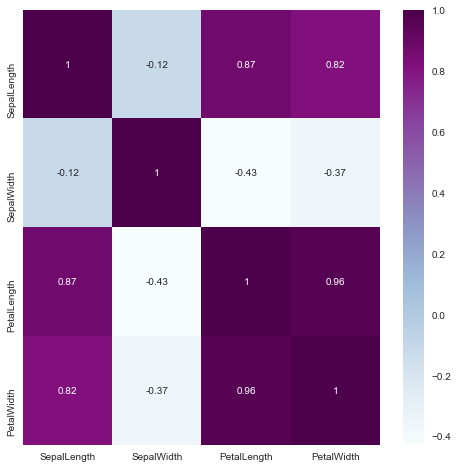

In [9]:
#Seaborn Plot of correlation
sns.heatmap(df.corr(),cmap="BuPu", annot=True)

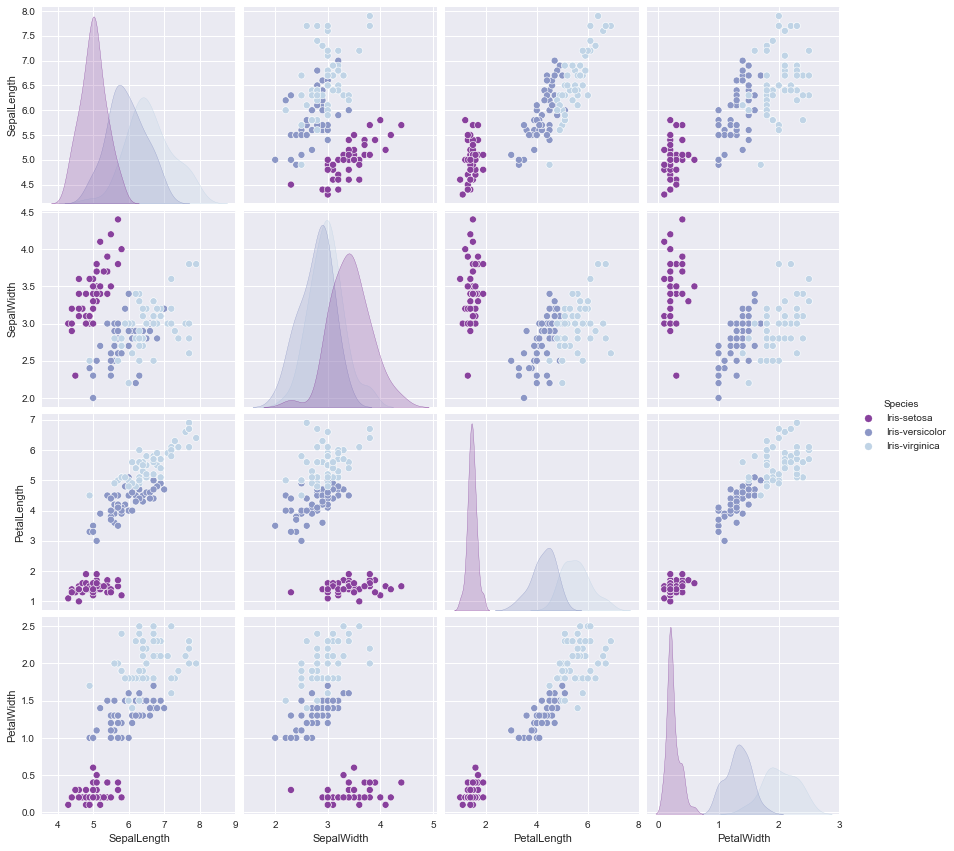

In [10]:
#Overview scatter plot of all Variables 
sns.pairplot(df,hue="Species", palette="BuPu_r", height=3)

Now some more detailed plots

In [11]:
#Set the species as varianles to plot
setosa = df.loc [df ["Species"] == "Iris-setosa"]
versicolor = df.loc [df ["Species"] == "Iris-versicolor"]
virginica = df.loc [df ["Species"] == "Iris-virginica" ]

In [12]:
def scatter(x,y):    
    #Plot by species
    plt.scatter(setosa[x], setosa[y], label='Setosa', c='b')
    plt.scatter(versicolor[x], versicolor[y], label='Versicolor', c='orange')
    plt.scatter(virginica[x], virginica[y], label='Virginica', c='g')

    #Set labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('{} vs {}'.format(x,y))

    #Add a legend
    plt.legend()
    plt.show()

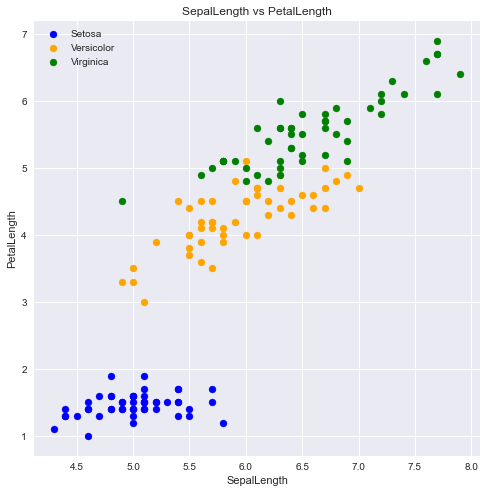

In [13]:
scatter("SepalLength","PetalLength")

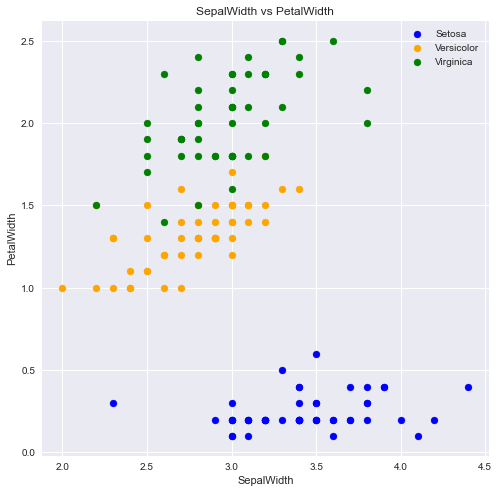

In [14]:
scatter("SepalWidth","PetalWidth")

Text(0.5, 0.98, 'Box Plots')

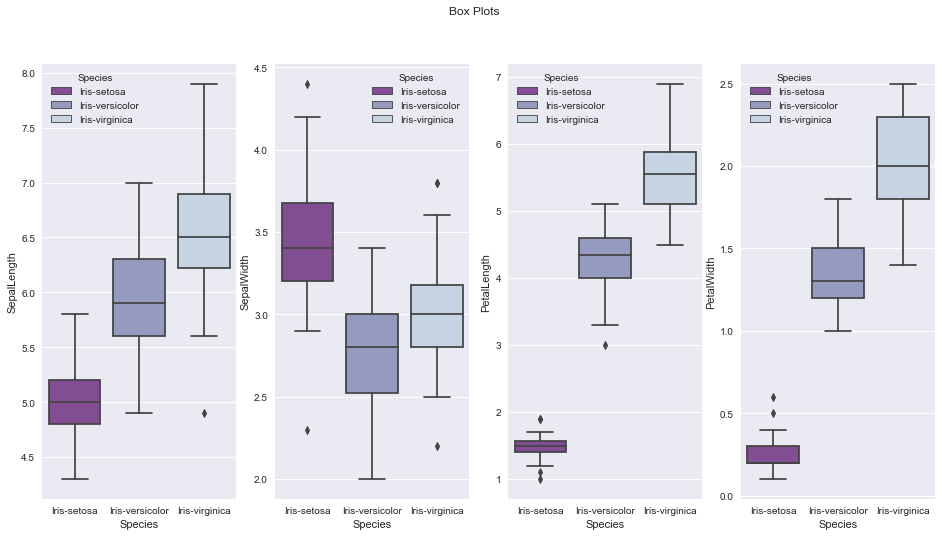

In [15]:
#Seaborn boxplots of 4 variables seperated by species
boxPlot, axes = plt.subplots(1,4, figsize=(16,8))
sns.boxplot(x="Species", y="SepalLength", hue="Species", data=df, palette="BuPu_r", ax=axes[0], dodge=False)    
sns.boxplot(x="Species", y="SepalWidth" , hue="Species", data=df, palette="BuPu_r", ax=axes[1], dodge=False)
sns.boxplot(x="Species", y="PetalLength", hue="Species", data=df, palette="BuPu_r", ax=axes[2], dodge=False)
sns.boxplot(x="Species", y="PetalWidth" , hue="Species", data=df, palette="BuPu_r", ax=axes[3], dodge=False)
plt.suptitle("Box Plots")

##### Train Model

Split the dataset in a test and train dataframes. In this case 20% test - 80% train so for the Iris dataset 30 - 120 rows

In [16]:
#Assign 20% of the dataset to test
train, test = mod.train_test_split(df, test_size = 0.2)

In [17]:
#Sample 5 rows
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
113,5.7,2.5,5.0,2.0,Iris-virginica
42,4.4,3.2,1.3,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa


In [18]:
#Show the indexes of the train data
train.index

Int64Index([113,  42,  27,  35,  16,  64,  58, 127,   8,  13,
            ...
            118,  11,  56,   4, 147,  30,  51, 100,  89, 144],
           dtype='int64', length=120)

In [19]:
#Sample 5 rows
test.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
26,5.0,3.4,1.6,0.4,Iris-setosa
111,6.4,2.7,5.3,1.9,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor
25,5.0,3.0,1.6,0.2,Iris-setosa


In [20]:
#Confirm test size
test.index.size

30

In [21]:
#selecting inputs and outputs 
inputs, outputs = train[['SepalLength','SepalWidth','PetalLength','PetalWidth']], train['Species']

In [22]:
X_test, Y_test = test[['SepalLength','SepalWidth','PetalLength','PetalWidth']], test['Species']

In [23]:
#Sample 5 rows
inputs.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
113,5.7,2.5,5.0,2.0
42,4.4,3.2,1.3,0.2
27,5.2,3.5,1.5,0.2
35,5.0,3.2,1.2,0.2
16,5.4,3.9,1.3,0.4


In [24]:
#Sample 5 rows
outputs.head()

113    Iris-virginica
42        Iris-setosa
27        Iris-setosa
35        Iris-setosa
16        Iris-setosa
Name: Species, dtype: object

Now that the data has been processed for supervised learning the following algorithms can be tested

# 3 interesting scikit-learn algorithms <a name="algorithms"></a>

The 3 algorithms to test are:
    
    * Logistic Regression - An example of supervised regression algorithm.
    * Support Vector Machines - Support Vector Classification - An example of supervised classification algorithm.
    * K-Means Clustering - An example of Unsupervised clustering algorithm.

## Logistic Regression <a name="lr"></a>

Logistic Regression is a supervised classification algorithm. Although the name says regression, it is a classification algorithm. Logistic regression measures the relationship between one or more independent variables (X) and the categorical dependent variable (Y) by estimating probabilities using a logistic(sigmoid) function. The term “Regression” comes because it estimates the probability of class membership or simply it is regressing for the probability of a categorical outcome. [7](https://medium.com/@kgpvijaybg/logistic-regression-on-iris-dataset-48b2ecdfb6d3)


1. Logistic regression is one of the most popular Machine Learning algorithms, used in the Supervised Machine Learning technique. It is used for predicting the categorical dependent variable, using a given set of independent variables.

2. It predicts the output of a categorical variable, which is discrete in nature. It can be either Yes or No, 0 or 1, but instead of giving the exact value as 0 and 1, it gives the output as the probability of the dataset which lies between 0 and 1.

3. It is similar to Linear Regression. The only difference is that Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems/Categorical problems.

4. In Logistic regression, the “S” shaped logistic (sigmoid) function is being used as a fitting curve, which gives output lying between 0 and 1. [8](https://www.analyticsvidhya.com/blog/2021/04/beginners-guide-to-logistic-regression-using-python/)


![image](https://editor.analyticsvidhya.com/uploads/95588WhatsApp-Image-2020-02-11-at-8.30.11-PM.jpeg)

As the data has already been split, the algorithm can be tested straight away.

In [25]:
#Assign the algorithm to a variable
model = lm.LogisticRegression()

In [26]:
#Use to ignore a warning while running fit() below
import warnings
warnings.simplefilter("ignore")

In [27]:
#Fit the model according to the given training data.
model.fit(inputs,outputs)

LogisticRegression()

##### Make Predictions

In [28]:
prediction = model.predict(X_test)
prediction

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)

In [29]:
expected = outputs
y_pred = model.predict(inputs)

### Accuracy

In [30]:
model.score(X_test,Y_test)

0.9333333333333333

In [31]:
model.score(inputs,outputs)

0.9833333333333333

##### Summarize the fit of the model

In [32]:
print(metrics.classification_report(test['Species'],prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.93        30
      macro avg       0.95      0.95      0.95        30
   weighted avg       0.93      0.93      0.93        30



<AxesSubplot:>

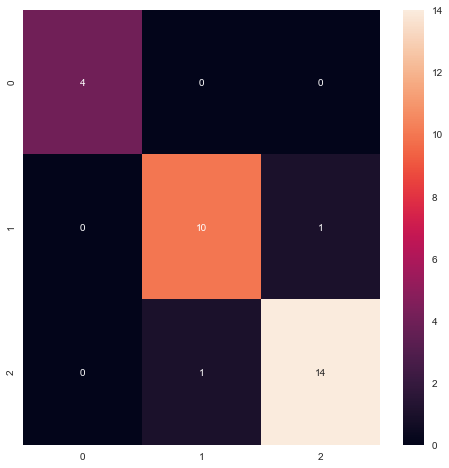

In [33]:
#Seaborn heatmap of test predictions
cm = confusion_matrix(test['Species'],prediction)
sns.heatmap(cm, annot=True)

In [34]:
print(metrics.classification_report(expected, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        46
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       0.97      0.97      0.97        35

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120



<AxesSubplot:>

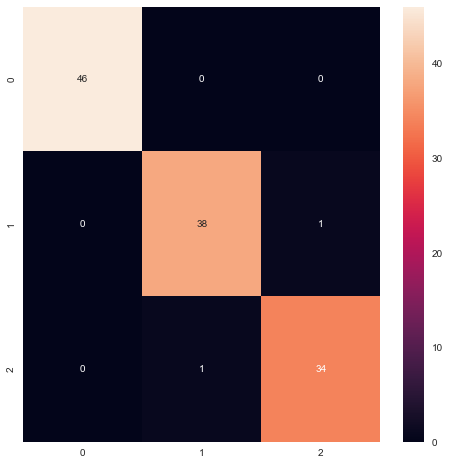

In [35]:
#Seaborn heatmap of trained predictions
cm = confusion_matrix(expected, y_pred)
sns.heatmap(cm, annot=True)

Generally scores very high with this prediction model for the Iris Dataset

## Support Vector Machines <a name="svm"></a>

SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition.

The classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points. [9](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)


![image](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)
[10](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

* Support Vectors
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

* Hyperplane
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

* Margin
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

Using the Iris dataset again the data will be prepared slightly differently

In [36]:
#Assign the variable to the columns
SepalLength = df.iloc[:,0].values
SepalWidth = df.iloc[:,1].values
PetalLength = df.iloc[:,2].values
PetalWidth = df.iloc[:,3].values

In [37]:
#Turn the single arrays into 1 2d array
X = np.column_stack((SepalLength,SepalWidth,PetalLength,PetalWidth))
y = df.Species

In [38]:
#Convert the species names into numerical data
l_encode = LabelEncoder()
y = l_encode.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
#Split dataset into training set and test set
X_train, X_test, y_train, y_test = mod.train_test_split(X,y, test_size = 0.2)

In [40]:
#Create a svm Classifier
clf = svm.SVC(kernel = 'linear', C = 1)
#Train the model using the training sets
clf.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [41]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array([2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 0, 2, 0, 0, 0, 0])

##### Accuracy

In [42]:
# Model Accuracy
clf.score(X_test,y_test)

1.0

In [43]:
clf.score(X_train,y_train)

0.975

<AxesSubplot:>

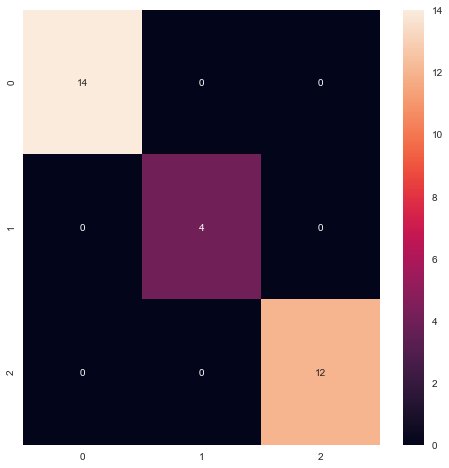

In [44]:
#Seaborn heatmap of test predictions
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [45]:
y_pred = clf.predict(X_train)
y_pred

array([1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 0, 0,
       2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1,
       1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 0,
       1, 1, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 2, 0, 1,
       0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 2, 1, 1, 2, 1, 2, 0, 2])

<AxesSubplot:>

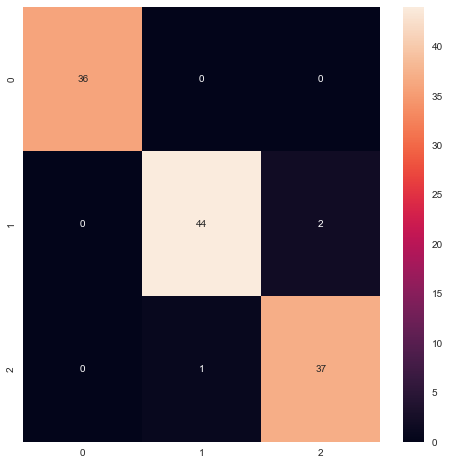

In [46]:
#Seaborn heatmap of trained predictions
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True)

##### Visualization

In [47]:
#Function to run the algorithm over two variables and plot the result 
def SVM(kernel,c):
    X = np.column_stack((SepalLength,PetalLength))
    y = df.Species

    l_encode = LabelEncoder()
    y = l_encode.fit_transform(y)

    X_train, X_test, y_train, y_test = mod.train_test_split(X,y, test_size = 0.2)

    clf = svm.SVC(kernel = kernel, C = c)
    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)
    
    print("Test =", clf.score(X_test,y_test))
    print("Train =",clf.score(X_train,y_train))

    pdr(X = X_train, y = y_train, clf=clf, legend = 1)

### Tuning Hyperparameters


* Kernel: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane.


* Regularization: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.

##### Sepal Length vs Petal Length

Compare Sepal Length vs Petal Length using a linear kernel with standard C

Test = 0.9666666666666667
Train = 0.9666666666666667


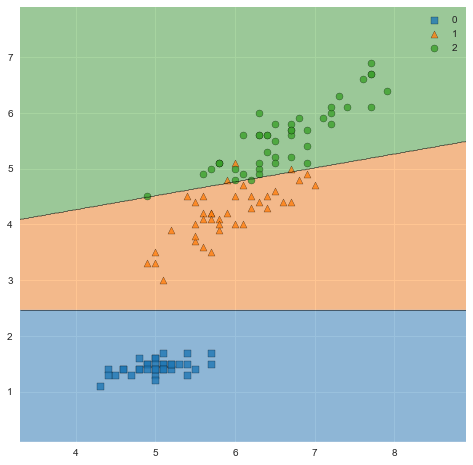

In [48]:
kernel = 'linear'
c = 1
SVM(kernel,c)

Compare Sepal Length vs Petal Length using a linear kernel and a low C

Test = 0.9333333333333333
Train = 0.9583333333333334


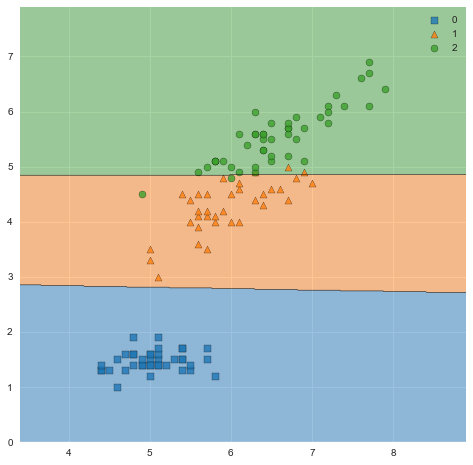

In [49]:
kernel = 'linear'
c = 0.1
SVM(kernel,c)

Compare Sepal Length vs Petal Length using a linear kernel and a high C

Test = 0.9666666666666667
Train = 0.9583333333333334


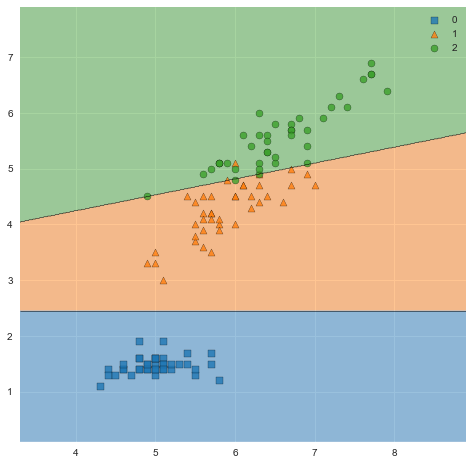

In [50]:
kernel = 'linear'
c = 100
SVM(kernel,c)

Compare Sepal Length vs Petal Length using a polynominal kernel and a standard C

Test = 0.9666666666666667
Train = 0.9583333333333334


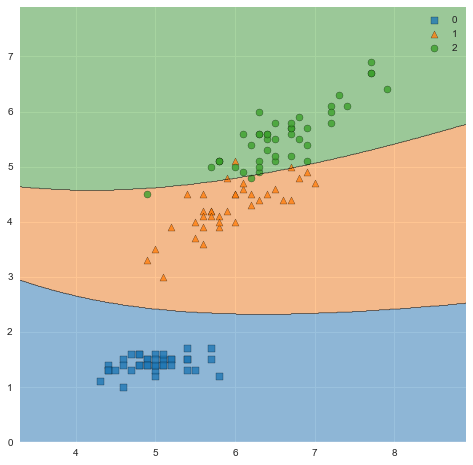

In [51]:
kernel = 'poly'
c = 1
SVM(kernel,c)

Compare Sepal Length vs Petal Length using a polynominal kernel and a high C

Test = 0.9666666666666667
Train = 0.9666666666666667


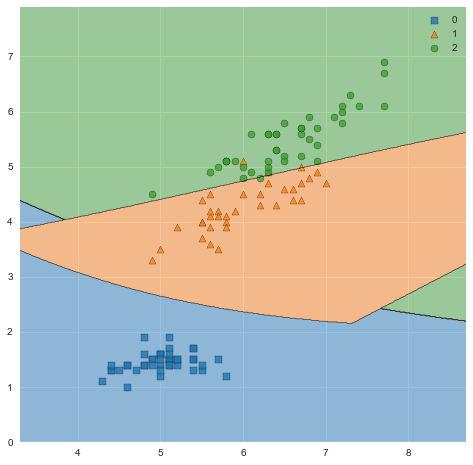

In [52]:
kernel = 'poly'
c = 100
SVM(kernel,c)

Compare Sepal Length vs Petal Length using a radial basis function kernel and a standard C

Test = 0.9333333333333333
Train = 0.9666666666666667


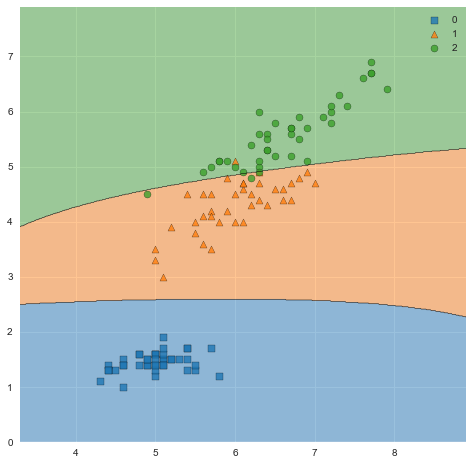

In [53]:
kernel = 'rbf'
c = 1
SVM(kernel,c)

Compare Sepal Length vs Petal Length using a radial basis function kernel and a high C

Test = 0.9666666666666667
Train = 0.9666666666666667


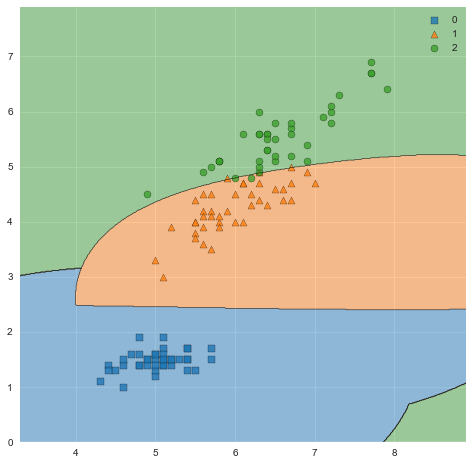

In [54]:
kernel = 'rbf'
c = 100
SVM(kernel,c)

SVM Classifiers offer good accuracy and perform fast prediction. It also uses less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space.

SVM is not suitable for large datasets because of its high training time. It works poorly with overlapping classes and is also sensitive to the type of kernel used.

## K-Means Clustering <a name="kmc"></a>

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid. It is an example of a unsupervised, prototype-based clustering algorithm.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.

To process the learning data, the K-Means algorithm starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative calculations to optimize the positions of the centroids seen in the gif below. [11](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)


![image](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/220px-K-means_convergence.gif)
[12](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/220px-K-means_convergence.gif)

It stops iterating when there is no change in the values of the centroids. 

The first step in K-Means is to pick the number of clusters or k. Using the Iris dataset there will be 3 clusters for each of the species.

##### Prepare the data

In [55]:
#Convert the species names into numerical data
l_encode = LabelEncoder()
y = df["Species"]
y = l_encode.fit_transform(y)

In [56]:
#Assign the data columns to a new df
data = df[['SepalLength','SepalWidth','PetalLength','PetalWidth']].values

In [57]:
#Create an instance of K-Means
kmeans = KMeans(n_clusters=3)

In [58]:
#Fit the model
KMmodel = kmeans.fit(data)

In [59]:
#Make predictions
y_pred = KMmodel.labels_
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [60]:
#K-means cluster centres
print(KMmodel.cluster_centers_)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


<AxesSubplot:>

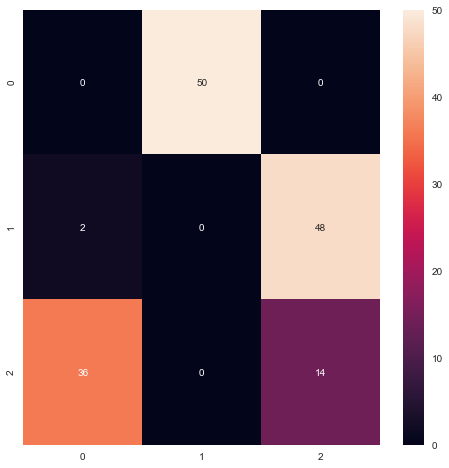

In [61]:
#Seaborn confusion matrix of predictions
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True)

In [62]:
#Define centroids for plotting
centroid = KMmodel.cluster_centers_

In [72]:
#[13]https://vitalflux.com/k-means-clustering-explained-with-python-example/
#Function to plot predicted classifications and their centroids
def KmeansPlot(x,y,xlabel,ylabel):
    
    #Plot of predictions from column index
    plt.scatter(data[y_pred == 0, x], data[y_pred == 0, y], marker='p',  label='Cluster 1', c='b')
    plt.scatter(data[y_pred == 1, x], data[y_pred == 1, y], marker='o', label='Cluster 2', c='orange')
    plt.scatter(data[y_pred == 2, x], data[y_pred == 2, y], marker='+', label='Cluster 3', c='g')
    #plot centroid from cluster centres and index
    plt.scatter(centroid[:, x], centroid[:, y],s=250, marker='*', c='r', edgecolor='black', label='Centroids')
    
    #Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("K-Means cluster plot with the centroids")
    
    
    #Add a legend
    plt.legend()
    plt.show()

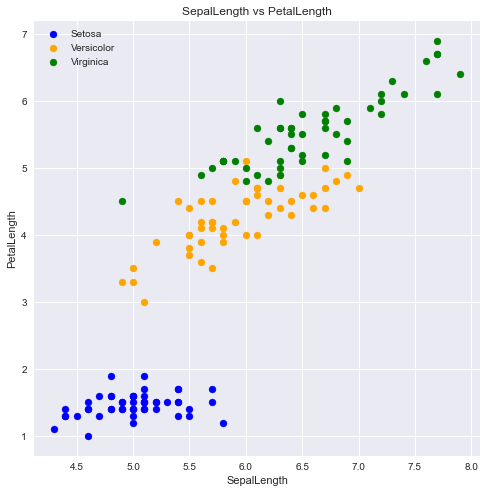

In [64]:
#Reference scatter of actual data
scatter("SepalLength","PetalLength")

Sepal Length vs Petal Length


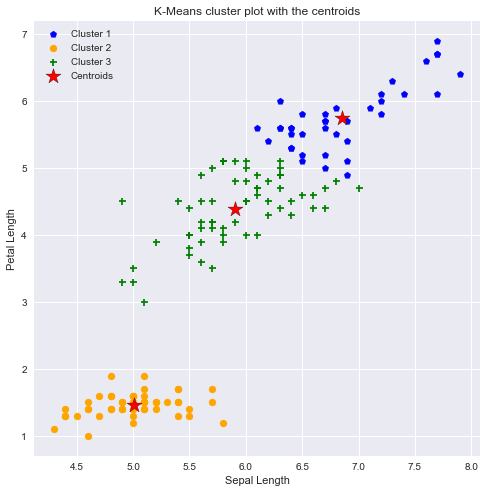

In [65]:
#K-Means cluster plot with the centroids
print("Sepal Length vs Petal Length")
KmeansPlot(0,2,'Sepal Length','Petal Length')

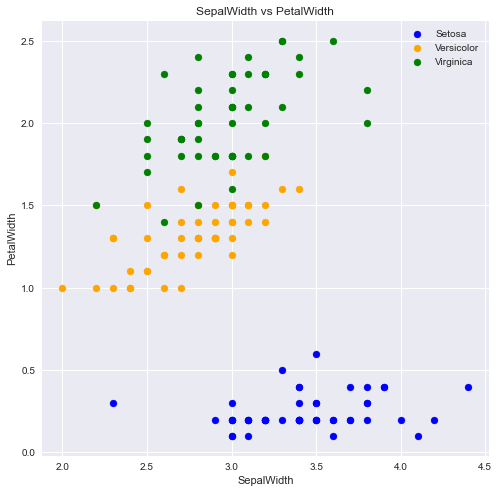

In [66]:
#Reference scatter of actual data
scatter("SepalWidth","PetalWidth")

Sepal Width vs Petal Width


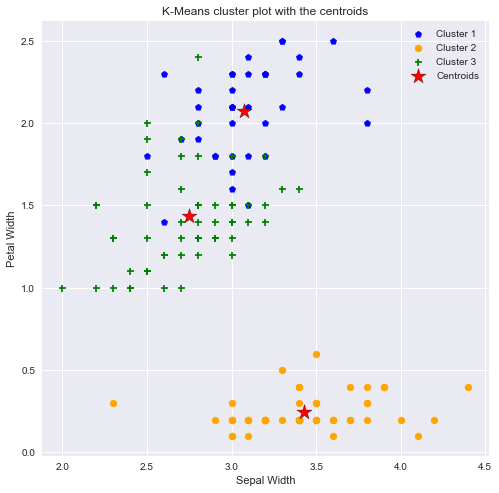

In [67]:
#K-Means cluster plot with the centroids
print("Sepal Width vs Petal Width")
KmeansPlot(1,3,'Sepal Width','Petal Width')

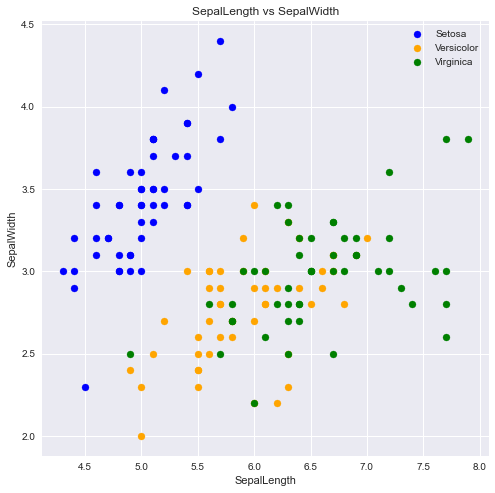

In [68]:
#Reference scatter of actual data
scatter("SepalLength","SepalWidth")

Sepal Length vs Sepal Width


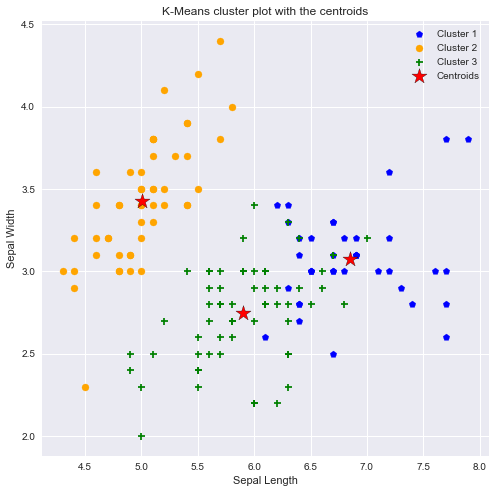

In [69]:
#K-Means cluster plot with the centroids
print("Sepal Length vs Sepal Width")
KmeansPlot(0,1,'Sepal Length', 'Sepal Width')

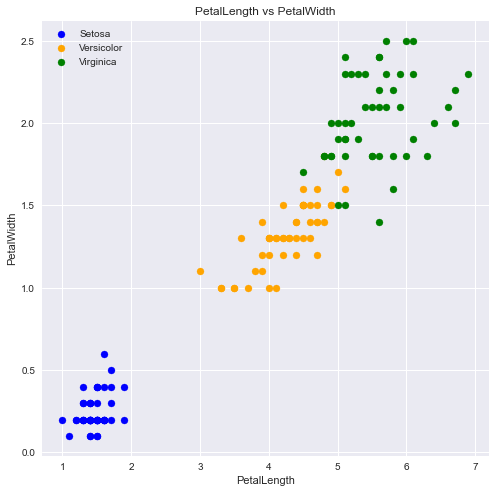

In [70]:
#Reference scatter of actual data
scatter("PetalLength","PetalWidth")

Petal Length vs Petal Width


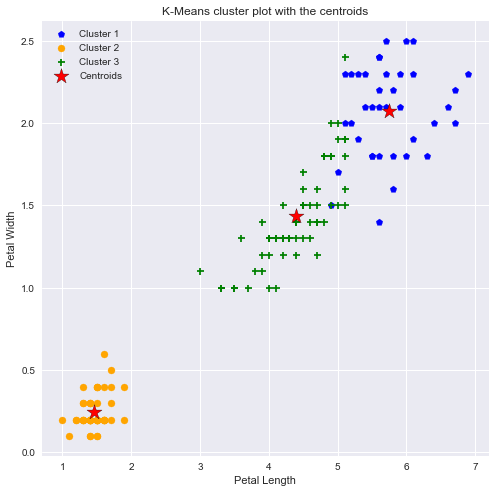

In [71]:
#K-Means cluster plot with the centroids
print("Petal Length vs Petal Width")
KmeansPlot(2,3, 'Petal Length','Petal Width')

K-means clustering is an extensively used technique for data cluster analysis.
It is easy to understand, and delivers training results quickly.
However, its performance is usually not as competitive as those of the other sophisticated clustering techniques because slight variations in the data could lead to high variance.
Furthermore, clusters are assumed to be spherical and evenly sized, something which may reduce the accuracy of the K-means clustering Python results. [14](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

## References <a name="ref"></a>

1. https://www.tutorialspoint.com/machine_learning_with_python/index.htm
2. https://www.tutorialspoint.com/scikit_learn/index.htm
3. https://www.ibm.com/cloud/learn/supervised-learning
4. https://www.kdnuggets.com/2021/01/ultimate-scikit-learn-machine-learning-cheatsheet.html
5. https://www.techtarget.com/searchenterpriseai/definition/unsupervised-learning
6. https://centricconsulting.com/blog/machine-learning-a-quick-introduction-and-five-core-steps/
7. https://medium.com/@kgpvijaybg/logistic-regression-on-iris-dataset-48b2ecdfb6d3
8. https://www.analyticsvidhya.com/blog/2021/04/beginners-guide-to-logistic-regression-using-python/
9. https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
10. http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png
11. https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
12. https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/220px-K-means_convergence.gif
13. https://vitalflux.com/k-means-clustering-explained-with-python-example/
14. https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
